In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. Parametrización del Sistema y el Controlador
# ------------------------------------------------
# Definición de parámetros para personalizar el sistema y el controlador
k = 1.0    # Ganancia del sistema
tau = 1.0  # Constante de tiempo del sistema

Kp = 1.0   # Ganancia proporcional
Ki = 1.0   # Ganancia integral
Kd = 0.0   # Ganancia derivativa

In [3]:
# Definición del sistema de primer orden
G = ctrl.TransferFunction([k], [tau, 1])

# Controlador PID
PID = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Función de transferencia en lazo cerrado
T_PID = ctrl.feedback(PID * G, 1)

In [4]:
# 2. Dominio de Tiempo Dinámico
# ------------------------------
# Rango del dominio temporal ajustado automáticamente basado en tau
t_end = max(4, 5 * tau)  # Tiempo final en función de la constante de tiempo
t = np.linspace(0, t_end, 1000)

In [5]:
# Respuesta al escalón
time_PID, yout_PID = ctrl.step_response(T_PID, t)

In [6]:
# 3. Evaluación Automática de Métricas de Desempeño
# --------------------------------------------------
# Cálculo de métricas: tiempo de asentamiento, sobreimpulso y error en estado estacionario
info = ctrl.step_info(T_PID)
settling_time = info['SettlingTime']
overshoot = info['Overshoot']
steady_state_error = abs(1 - yout_PID[-1])  # Error absoluto en estado estacionario

In [7]:
# 4. Rango Dinámico en los Gráficos
# ---------------------------------
# Ajustar dinámicamente los límites del eje Y
y_min = min(yout_PID) - 0.5
y_max = max(yout_PID) + 0.5

(-0.5, 1.4932620530009357)

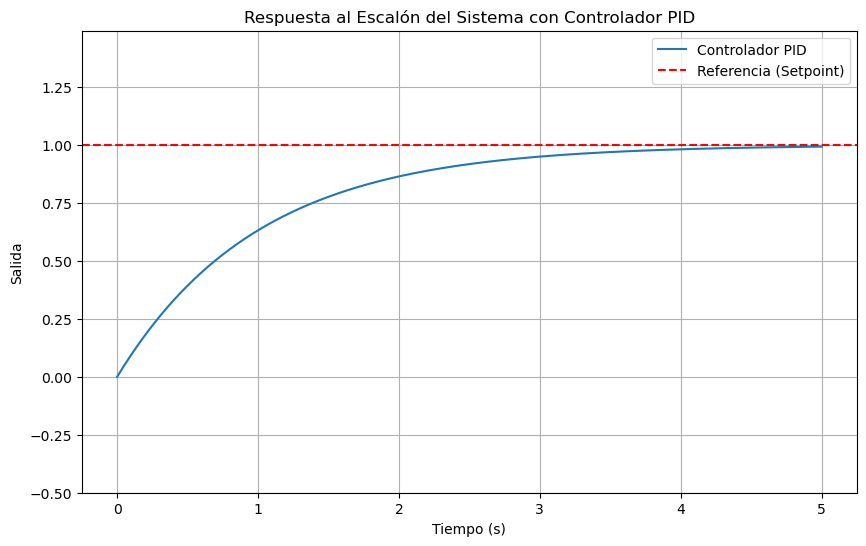

In [8]:
# 5. Comentarios y Documentación
# -------------------------------
# Añadimos comentarios explicativos en cada sección del código

# Graficar la respuesta
plt.figure(figsize=(10, 6))
plt.plot(time_PID, yout_PID, label="Controlador PID")
plt.title("Respuesta al Escalón del Sistema con Controlador PID")
plt.xlabel("Tiempo (s)")
plt.ylabel("Salida")
plt.axhline(y=1, color='r', linestyle='--', label="Referencia (Setpoint)")
plt.legend()
plt.grid(True)
plt.ylim(y_min, y_max)


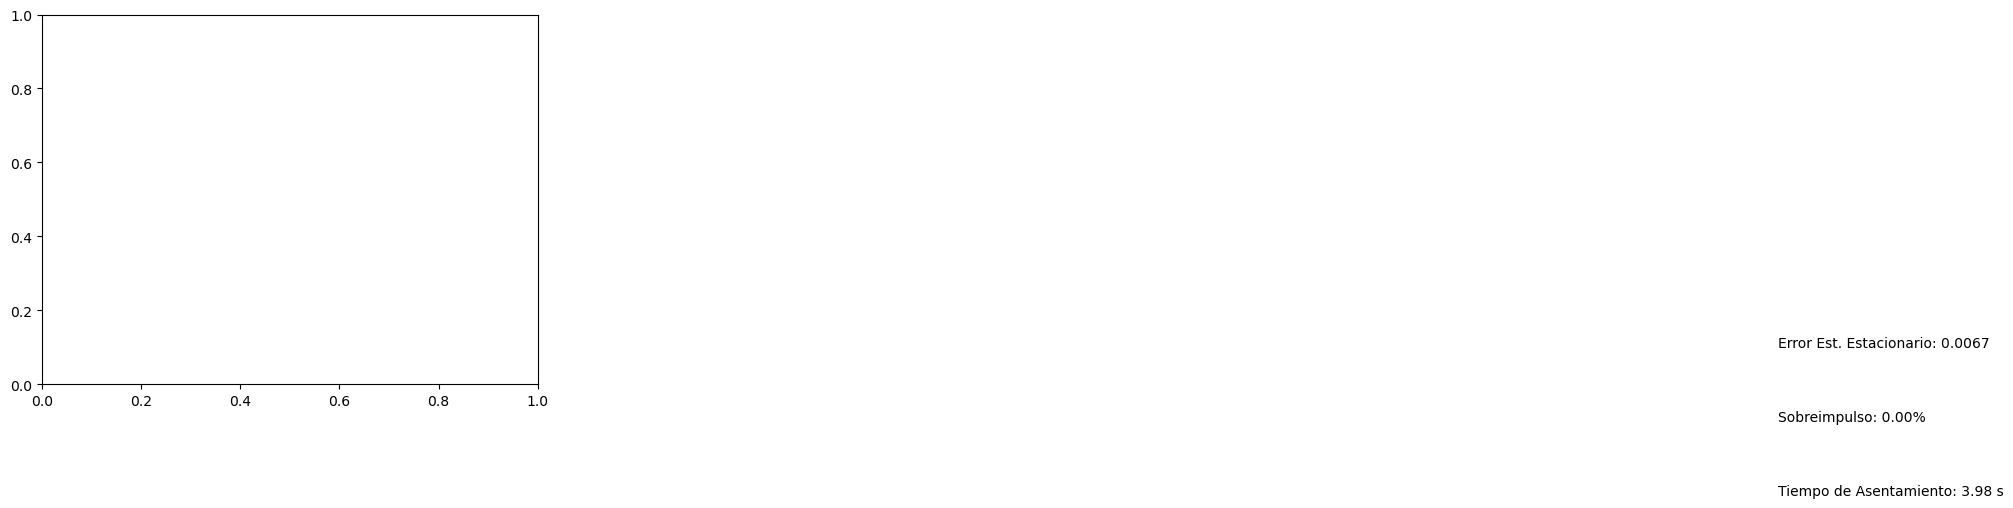

In [9]:
# Mostrar las métricas en el gráfico
plt.text(0.7 * t_end, y_min + 0.2, f"Tiempo de Asentamiento: {settling_time:.2f} s")
plt.text(0.7 * t_end, y_min + 0.4, f"Sobreimpulso: {overshoot:.2f}%")
plt.text(0.7 * t_end, y_min + 0.6, f"Error Est. Estacionario: {steady_state_error:.4f}")

plt.show()